# Use CDF to Calculate Probabilities

by Israel Diaz

## Assignment

Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

1. between 55.0 and 56.0 inches

2. is less than 5 feet (60 in)

3. is greater than the mean (hint: do you know this answer intuitively?)

## Solution

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Load Data

In [2]:
data = pd.read_csv('data/weight-height male-female - weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Cumulative Distribution Function

In [5]:
## Saving only instances where Gender is Female
females = data.loc[data['Gender']=='Female'].copy()

In [7]:
## save height as data
data = females['Height']

In [8]:
## Defining lower and higher ends
low_end = 55.0
high_end = 56.0

In [9]:
## Calculating statistics
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

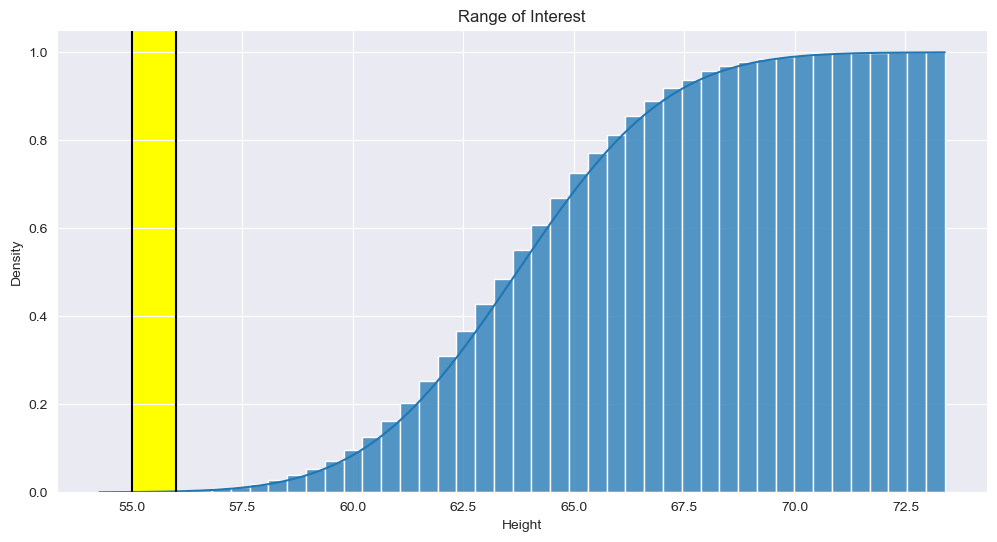

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
# Range
x_range = np.linspace(min, max,1000)
# CDF
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)
## CD
sns.histplot(x=data, stat='density', cumulative=True)
ax.plot(x_range, cdf)
ax.axvline(low_end, color='black')
ax.axvline(high_end, color='black')
ax.axvspan(low_end, high_end, color='yellow', zorder=0)
ax.set_title('Range of Interest');

In [18]:
prob_1 = stats.norm.cdf(high_end, loc=mean,scale=std) - stats.norm.cdf(low_end,loc=mean, scale=std)

print(f'The probability of a female having a Height between {low_end} and {high_end} is {round(prob_1*100, 2)}%')

The probability of a female having a Height between 55.0 and 56.0 is 0.15%


In [19]:
prob_2 = stats.norm.cdf(60, loc=mean,scale=std)

print(f'The probability of a female having a Height lower than 60in is {round(prob_2*100, 2)}%')

The probability of a female having a Height lower than 60in is 8.45%


In [20]:
prob_3 = 1 - stats.norm.cdf(mean, loc=mean,scale=std)

print(f'The probability of a female having a Height lower than the mean is {round(prob_3*100, 2)}%')

The probability of a female having a Height lower than the mean is 50.0%
